---
title: simple NLP
author: vanh
date: 'July, 13,2023'
format:
    html:
        code-fold: false
execute:
    enabled: false
---

In [1]:
import sys
sys.path.insert(0,'../../Tools/code')

In [2]:


import importlib
import util
importlib.reload(util)

# IMPORT SOME BASIC TOOLS:
from pprint import pprint
import pyarrow



[nltk_data] Downloading package punkt to /home/vanh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /home/vanh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /home/vanh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /home/vanh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
# !pip install  datasets

In [4]:
from datasets.inspect import list_datasets, list_metrics
from datasets.load import load_dataset, load_metric

/home/vanh/miniconda3/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## HuggingFace data hub

Getting list of available dataset on Huggingface hub
then load the rotten tomatoes dataset for use in sentiment analysis
- Most of these dataset already been curated in some case splitted into train,validation,test set

In [5]:
# Get the list of the datasets from the datahub
datasets = list_datasets()

# Print the first 10 datasets
print('-------------------------------------------------------------')
print(f"Currently {len(datasets)} datasets are available on the hub:")
print('-------------------------------------------------------------')
print(', '.join(datasets))


/tmp/ipykernel_159989/3712484522.py:2: FutureWarning: list_datasets is deprecated and will be removed in the next major version of datasets. Use 'huggingface_hub.list_datasets' instead.
  datasets = list_datasets()


-------------------------------------------------------------
Currently 46179 datasets are available on the hub:
-------------------------------------------------------------
acronym_identification, ade_corpus_v2, adversarial_qa, aeslc, afrikaans_ner_corpus, ag_news, ai2_arc, air_dialogue, ajgt_twitter_ar, allegro_reviews, allocine, alt, amazon_polarity, amazon_reviews_multi, amazon_us_reviews, ambig_qa, americas_nli, ami, amttl, anli, app_reviews, aqua_rat, aquamuse, ar_cov19, ar_res_reviews, ar_sarcasm, arabic_billion_words, arabic_pos_dialect, arabic_speech_corpus, arcd, arsentd_lev, art, arxiv_dataset, ascent_kb, aslg_pc12, asnq, asset, assin, assin2, atomic, autshumato, facebook/babi_qa, banking77, bbaw_egyptian, bbc_hindi_nli, bc2gm_corpus, beans, best2009, bianet, bible_para, big_patent, billsum, bing_coronavirus_query_set, biomrc, biosses, blbooks, blbooksgenre, blended_skill_talk, blimp, blog_authorship_corpus, bn_hate_speech, bnl_newspapers, bookcorpus, bookcorpusopen, boolq,

In [6]:


# Importing the Rotten Tomatoes Movie review dataset
dataset = load_dataset('rotten_tomatoes')

print('--------------------------------------------')
print('Dataset consists of:')
print('--------------------------------------------')
print('Training data (n=' , len(dataset['train'])      , '),',
      'Validataion data (n=' , len(dataset['validation']) , '), and', 
      'Teting data (n=' , len(dataset['test']) , ')')

# Extracting the first training set point
print('\n--------------------------------------------')
print('Example sentence from Training set:')
print('--------------------------------------------')
print(dataset['train']['text'][0])

print('\n--------------------------------------------')
print('Example Label from training set')
print('--------------------------------------------')
print(dataset['test']['label'][0])



Found cached dataset rotten_tomatoes (/home/vanh/.cache/huggingface/datasets/rotten_tomatoes/default/1.0.0/40d411e45a6ce3484deed7cc15b82a53dad9a72aafd9f86f8f227134bec5ca46)
100%|██████████| 3/3 [00:00<00:00, 1157.26it/s]

--------------------------------------------
Dataset consists of:
--------------------------------------------
Training data (n= 8530 ), Validataion data (n= 1066 ), and Teting data (n= 1066 )

--------------------------------------------
Example sentence from Training set:
--------------------------------------------
the rock is destined to be the 21st century's new " conan " and that he's going to make a splash even greater than arnold schwarzenegger , jean-claud van damme or steven segal .

--------------------------------------------
Example Label from training set
--------------------------------------------
1


## Metric

performance metrics are ways that you choose to measure the success and/or failure of your model; the appropriate metric usually depends on the specific task and it's accompanying constraints, which is why its important to understand what they are measuring. In fact, there is nothing that stops you from creating a new performance metric if an existing measure doesn't fit your task well.

- There is a list of available metric on Huggingface Hub and new one is created all the time

In [7]:


# List the performance metrics available
metrics  = list_metrics()
print(f"Currently {len(metrics)} metrics are available on the hub:")
pprint(metrics, compact=True)



Currently 119 metrics are available on the hub:
['accuracy', 'bertscore', 'bleu', 'bleurt', 'brier_score', 'cer', 'character',
 'charcut_mt', 'chrf', 'code_eval', 'comet', 'competition_math', 'coval',
 'cuad', 'exact_match', 'f1', 'frugalscore', 'glue', 'google_bleu',
 'indic_glue', 'mae', 'mahalanobis', 'mape', 'mase', 'matthews_correlation',
 'mauve', 'mean_iou', 'meteor', 'mse', 'nist_mt', 'pearsonr', 'perplexity',
 'poseval', 'precision', 'r_squared', 'recall', 'rl_reliability', 'roc_auc',
 'rouge', 'sacrebleu', 'sari', 'seqeval', 'smape', 'spearmanr', 'squad',
 'squad_v2', 'super_glue', 'ter', 'trec_eval', 'wer', 'wiki_split', 'xnli',
 'xtreme_s', 'AlhitawiMohammed22/CER_Hu-Evaluation-Metrics',
 'BucketHeadP65/confusion_matrix', 'BucketHeadP65/roc_curve',
 'Drunper/metrica_tesi', 'Felipehonorato/eer', 'He-Xingwei/sari_metric',
 'JP-SystemsX/nDCG', 'Josh98/nl2bash_m', 'Kyle1668/squad',
 'Muennighoff/code_eval', 'NCSOFT/harim_plus', 'Natooz/ece',
 'NikitaMartynov/spell-check-metric'

/tmp/ipykernel_159989/2522456596.py:2: FutureWarning: list_metrics is deprecated and will be removed in the next major version of datasets. Use 'evaluate.list_evaluation_modules' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metrics  = list_metrics()


In [8]:
# !pip install sacrebleu

In [9]:


metric = load_metric('sacrebleu')

# Import the bertscore_metric by Zhang et al.
sacrebleu_metric = load_metric('sacrebleu')

# Print the metric's description:
print('-------------------------------------------------------------')
print('Description of the Metric')
print('-------------------------------------------------------------')
print(sacrebleu_metric.description)



/tmp/ipykernel_159989/2315875711.py:1: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric('sacrebleu')


-------------------------------------------------------------
Description of the Metric
-------------------------------------------------------------
SacreBLEU provides hassle-free computation of shareable, comparable, and reproducible BLEU scores.
Inspired by Rico Sennrich's `multi-bleu-detok.perl`, it produces the official WMT scores but works with plain text.
It also knows all the standard test sets and handles downloading, processing, and tokenization for you.

See the [README.md] file at https://github.com/mjpost/sacreBLEU for more information.



### Process the Data set
simply taking the movie reviews data, creating a single python list of sentences (X), and a corresponding list of binary labels (y).

convert these sentences to their bag-of-words representation and, from there, try to predict the value of y using X.


In [10]:
# !pip install -U scikit-learn

In [11]:
#-------------------------------------------------------
# Import the rotten tomatoes dataset:
#-------------------------------------------------------
dataset   = load_dataset('rotten_tomatoes')

#-------------------------------------------------------
# Flatten out the dataset to get a single list of all the 
# sentences in the train, validation and test sets
# as well as the movie review labels.
#-------------------------------------------------------
sentences = dataset['train']['text']  + dataset['validation']['text'] + dataset['test']['text']
y         = dataset['train']['label'] + dataset['validation']['label'] + dataset['test']['label']

#-------------------------------------------------------
# Generate the bag-of-words representation of the text: 
#-------------------------------------------------------
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

vectorizer = CountVectorizer()
X          = vectorizer.fit_transform(sentences)

#-------------------------------------------------------
# Split the data into training (80%) and testing (20%) sets
#-------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, stratify = y, random_state = 123)

Found cached dataset rotten_tomatoes (/home/vanh/.cache/huggingface/datasets/rotten_tomatoes/default/1.0.0/40d411e45a6ce3484deed7cc15b82a53dad9a72aafd9f86f8f227134bec5ca46)
100%|██████████| 3/3 [00:00<00:00, 2196.74it/s]


### SKlearn prebuild model
using a simple logistic regression model from sklearn

In [12]:


from sklearn.linear_model    import LogisticRegression
from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn.metrics         import confusion_matrix

#-------------------------------------------------------
# Initialize four Logistic Regression models, 
# each with a different penalty
#-------------------------------------------------------
lr        = LogisticRegression(penalty  = 'none')                                                # No penalty
lr_l2     = LogisticRegression(penalty  = 'l2'        , solver = 'newton-cg' )                   # L2 penalty
lr_l1     = LogisticRegression(penalty  = 'l1'        , solver = 'saga'      )                   # L1 penalty
lr_l1l2   = LogisticRegression(penalty  = 'elasticnet', solver = 'saga' ,l1_ratio = 0.5)         # L1-L2 penalty

#-------------------------------------------------------
# Fit all four models using the training data
# Store a list of models for ease of evaluation later...
#-------------------------------------------------------
models = {}
models['Logistic_Regression']              = lr.fit(X_train,y_train)
models['Logistic_Regression_(L2)']         = lr_l2.fit(X_train,y_train)
models['Logistic_Regression_(L1)']         = lr_l1.fit(X_train,y_train)
models['Logistic_Regression_(Elasticnet)'] = lr_l1l2.fit(X_train,y_train)



/home/vanh/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/vanh/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/vanh/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


 ## Model evaluation
 
 the AUROC measure, a value of 1 is the best you can get. With that in mind, this model is performing excellently on the training set; it's also performing pretty well on the testing set, especially when we consider that our bag-of-words representation is using simple uni-grams, and is consequently insensitive to the order of words

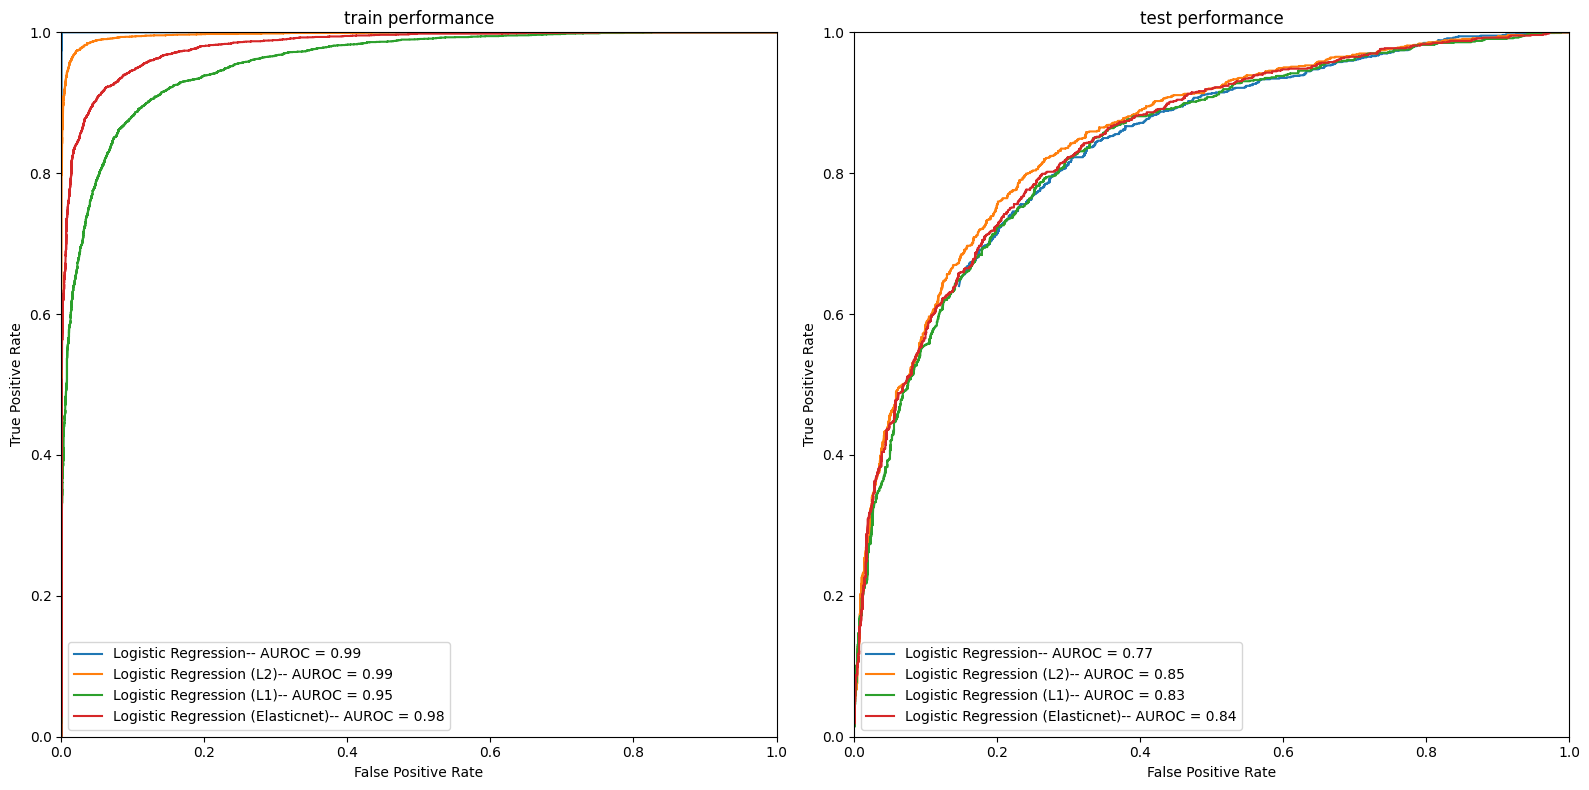

In [13]:


import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import auc

#-------------------------------------------------------
# Initialize a figure
#-------------------------------------------------------
fig, axs = plt.subplots(1,2, figsize=(16,8))

#-------------------------------------------------------
# Compute AUCs for Training and Testing Sets
#-------------------------------------------------------
for i,data_set in enumerate(['train','test']):
    

    if data_set == 'train':
        X = X_train; y = y_train
    else:
        X = X_test; y = y_test
        
    # For each of the model...
    for model in models.keys():

        # get the predicted probabilities on the test set
        probs    = models[model].predict_proba(X)

        # get the total set of the predictions for y = 1:
        thresholds = list(set(probs[:,1]))

        # for each threshold, transform the probabilities into predictions 
        # and get the true positive rate (tpr) as well as the false positive rate (fpr)
        tpr, fpr = [], []
        for t in thresholds:

            # Make predictions, given the threshold
            predict = [1 if x >= t else 0 for x in probs[:,1]]

            # Generate the element of the confusion matrix
            tp_i = sum([1 if (predict[i] == 1 and y[i] == 1) else 0 for i in range(len(predict))])   # True  Positives
            fp_i = sum([1 if (predict[i] == 1 and y[i] == 0) else 0 for i in range(len(predict))])   # False Positives
            fn_i = sum([1 if (predict[i] == 0 and y[i] == 1) else 0 for i in range(len(predict))])   # False Negatives
            tn_i = sum([1 if (predict[i] == 0 and y[i] == 0) else 0 for i in range(len(predict))])   # True  Negatives

            # compute the true positive rate and false positive rate
            tpr.append(tp_i / (tp_i + fn_i))
            fpr.append(fp_i / (fp_i + tn_i))

        # sort results by fpr for plotting purposes
        index = list(np.argsort(fpr))
        tpr,fpr = [tpr[i] for i in index], [fpr[i] for i in index] 

        # generate the label for the plot
        label = model.replace('_',' ') + '-- AUROC = ' + str(auc(fpr, tpr))[0:4]

        # Add the line to the plot
        axs[i].plot(fpr, tpr, label=label )
        
    # Decorate the plot
    axs[i].legend()
    axs[i].set_xlim((0, 1)) 
    axs[i].set_ylim((0, 1)) 
    axs[i].set_xlabel('False Positive Rate')
    axs[i].set_ylabel('True Positive Rate')
    axs[i].set_title(data_set + ' performance')
    
plt.tight_layout()



### Analysis

Logistic Regression without regularization (blue line) has the best-in-class training set performance (AUC=0.99!) but those impressive results don't translate to the unseen testing set - where it has the worst-in-class performance

Anytime you observe large discrepancies between the testing and training performance, it is a red flag that your model has over-fit to the training data.


#### Regularization
Regularization makes the model consider the trade-off in the costs of tuning the parameter, and the consequent gains it obtains due to that tuning.

It is improve performance on data it had never seen before in the testing set.

When we perform elasticnet regularization we can control the strength of regularization (in sklearn, this is the C paramter), as well as the relative weight of the L1 and L2 penalties (in sklearn, this is controlled by the l1_ratio parameter).

#### Hyperparameter
Parameter that is fine tune outside of the model 

In [14]:
import os

In [15]:
if os.path.isfile('../../data/json_file/logisticregression_aucs.json'):
    print("true")
else:
    print("false")

true


In [16]:
# f = open("'../../data/json_file/logisticregression_aucs.json'","r")
# /../data/json_file/logisticregression_aucs.json'" , "w")

In [17]:
import os
import json 
from sklearn.metrics import roc_auc_score

#-------------------------------------------------------
# Check if the results are already computed, and if so, import them
#-------------------------------------------------------
if os.path.isfile('../../data/json_file/logisticregression_aucs.json'):
    print('---------------------------------')
    print('       Importing Results         ')
    print('---------------------------------')
    with open('../../data/json_file/logisticregression_aucs.json') as f:
        auc_c = json.load(f)

#-------------------------------------------------------
# Otherwise, compute the results and save them to disk.
#-------------------------------------------------------
else:    
    print('---------------------------------')
    print('       Generating Results        ')
    print('---------------------------------')
    
    auc_c = []
    # For various penalty amplitudes
    for c in range(1,20,1):
        
        auc_r = []
    
        # For various L1-L2 penalty ratios.
        for r in range(0,20,1):

            #initialize the model
            lr   = LogisticRegression(penalty  = 'elasticnet', solver = 'saga', C = c/20, l1_ratio = r/20)   # L1-L2 penalty

            # fit the model
            lr.fit(X_train,y_train)

            # generate the prediction probabilities
            probs  = lr.predict_proba(X_test)

            # get the AUC
            auc_r.append(roc_auc_score(y_test, probs[:,1]))

        auc_c.append(auc_r)
        
    # Save the results to disk  
    x = json.dumps(auc_c)
    f = open("'../../data/json_file/logisticregression_aucs.json'" , "w")
    f.write(x)
    f.close()

---------------------------------
       Importing Results         
---------------------------------


In [18]:
import seaborn as sns

#-------------------------------------------------------
#Generate the heatmap
#-------------------------------------------------------
plt.figure(figsize = (10,8))
ax = sns.heatmap(auc_c, cbar_kws={'label': 'AUROC (Test Set)'})

#-------------------------------------------------------
# Set the X Label and Tickmarks:
#-------------------------------------------------------
plt.xlabel("L1-L2 Ratio ('l1_ratio')")
plt.xticks(ticks   = range(0,20), 
          labels   = [str(0.05 * x)[0:4] for x in range(0,20)],
          rotation = 'vertical')

#-------------------------------------------------------
# Set the Y Labels and Tickmarks:
#-------------------------------------------------------
plt.ylabel("Regularization Amplitude ('C')")
plt.yticks(ticks    = range(0,20), 
           labels   = [str(0.05 * x)[0:4] for x in range(0,20)],
           rotation = 'horizontal')

plt.title("Logistic Regression performance for various hyperparameter settings")

Text(0.5, 1.0, 'Logistic Regression performance for various hyperparameter settings')

### Heatmap
Light color model do better than dark color


- C and L1-ratio affect the performance set C to 0 and l1-ratio to 1 get darkest color bad performance
- set C to 1 and l1-ratio to 0 get best performance

In [19]:
print('-------------------------------------------')
print('Size of the Rotten Tomatoes Training Data')
print('-------------------------------------------')
print(X_train.shape[0], 'x', X_train.shape[1])

-------------------------------------------
Size of the Rotten Tomatoes Training Data
-------------------------------------------
8529 x 18330


In [20]:
#-------------------------------------------------------------
# Get the counts:
#-------------------------------------------------------------
counts = []
for i in range(0,X_train.shape[1]):
    counts.append(np.sum(X_train[:,i]))

#-------------------------------------------------------------
# Print the counts:
#-------------------------------------------------------------
for i in range(1,10):
    print(str(100*util.CountFrequency(counts)[i] / X_train.shape[1])[0:4], '% of unigrams occur', i, 'times')

42.4 % of unigrams occur 1 times
14.5 % of unigrams occur 2 times
7.50 % of unigrams occur 3 times
4.90 % of unigrams occur 4 times
3.44 % of unigrams occur 5 times
2.54 % of unigrams occur 6 times
1.80 % of unigrams occur 7 times
1.48 % of unigrams occur 8 times
1.20 % of unigrams occur 9 times


Text(0.5, 1.0, 'Testing performance')

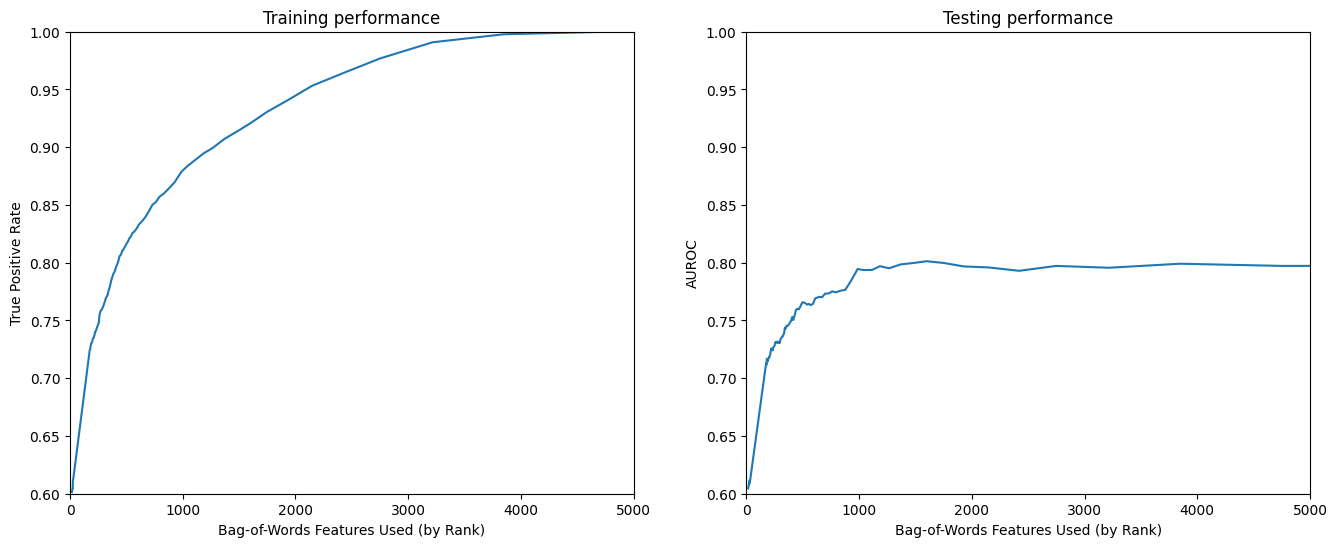

In [21]:
import warnings
warnings.filterwarnings("ignore")

#-------------------------------------------------------------
# Initialize the plot
#-------------------------------------------------------------
fig, axs = plt.subplots(1,2, figsize=(16,6))

#-------------------------------------------------------------
# Plot the train performance of logistic regression given features
#-------------------------------------------------------------
aucs = []
features = []
for i,c in enumerate(set(counts)): 
    
    # Get the features we want to keep
    columns_to_keep = [i for i,x in enumerate(counts) if (x >= c)]
    features.append(X_train[:,columns_to_keep].shape[1])
    
    #fit the model using the selected features
    lr  = LogisticRegression(penalty  = 'none') 
    lr.fit(X_train[:,columns_to_keep],y_train)
    
    #compute the AUC and append
    probs = lr.predict_proba(X_train[:,columns_to_keep])
    aucs.append(roc_auc_score(y_train, probs[:,1]))
    if i == 100:
        break

# Sort and Plot        
index = list(np.argsort(features))
aucs,features = [aucs[i] for i in index], [features[i] for i in index] 
axs[0].plot(features, aucs)
axs[0].set_xlabel('Bag-of-Words Features Used (by Rank)')
axs[0].set_ylabel('True Positive Rate')
axs[0].set_ylim((0.6, 1))
axs[0].set_xlim((0, 5000))
axs[0].set_title('Training performance')
        
#-------------------------------------------------------------
# Plot the test performance of logistic regression given features
#-------------------------------------------------------------        
aucs = []
features = []
for i,c in enumerate(set(counts)): 
    
    # Get the features we want to keep
    columns_to_keep = [i for i,x in enumerate(counts) if (x >= c)]
    features.append(X_train[:,columns_to_keep].shape[1])
    
    #fit the model using the selected features
    lr.fit(X_train[:,columns_to_keep],y_train)
    
    #compute the AUC and append
    probs = lr.predict_proba(X_test[:,columns_to_keep])
    aucs.append(roc_auc_score(y_test, probs[:,1]))
    if i == 100:
        break

# Sort and Plot
index = list(np.argsort(features))
aucs,features = [aucs[i] for i in index], [features[i] for i in index] 
axs[1].plot(features, aucs)
axs[1].set_xlabel('Bag-of-Words Features Used (by Rank)')
axs[1].set_ylabel('AUROC')
axs[1].set_ylim((0.6, 1))
axs[1].set_xlim((0, 5000))
axs[1].set_title('Testing performance')

Plot illustrates that we can toss out all but the first 1,600 or so words by rank and increase the performance of the standard logistic regression model on the test set to 0.8, even without the regularization!

## PCA

The reason that regularization has such a positive impact is because a bag-of-words representation can become onerously large due to the realities of Zipf's law. 

the terms which occur infrequently provide little-to-no additional value for classification problems. This help reduces the resource requirement of the machine.

PCA can help reduce the data further by cast it into orthogonal basic vector which range the amount of variance in the data and order them as first PC cover the greatest amount of variance and second PC cover lesser variance and so on.

Because of these ranging only the first few(n) PC is needed to cover most of the performance increase.

In [22]:
from sklearn.decomposition import PCA

#-------------------------------------------------------------
# Figure out which columns to keep based on the count of the occurances being 12 or less:
#-------------------------------------------------------------
c = 12
columns_to_keep = [i for i,x in enumerate(counts) if (x >= c)]

#-------------------------------------------------------------
# Perform PCA on the data
#-------------------------------------------------------------
pca = PCA()
pca.fit( X_train[:,columns_to_keep].toarray() )
X_train_pca = pca.transform(X_train[:,columns_to_keep].toarray())
X_test_pca  = pca.transform(X_test[:,columns_to_keep].toarray())


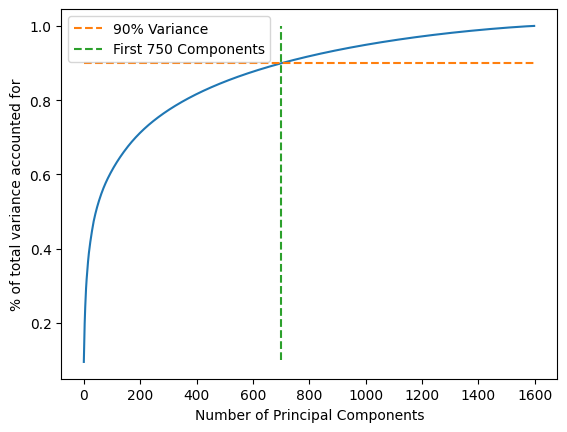

In [23]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(0,len(columns_to_keep)),cumulative_variance)
plt.plot([0,1600],[0.9,0.9], '--', label='90% Variance')
plt.plot([700,700],[0.1,1.0],'--', label='First 750 Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('% of total variance accounted for')
plt.legend()


It looks like we can retain 90% of the variance in our data using just 750 dimensions; that's less than half of the 1,600 we had earlier! 

In [24]:
n = 750
#-------------------------------------------------------------
#fit the model using only half the components (750 / 1600)
#-------------------------------------------------------------
lr  = LogisticRegression(penalty  = 'none') 
lr.fit(X_train_pca[:,0:n],y_train)

#-------------------------------------------------------------
#Compute the AUC
#-------------------------------------------------------------
probs = lr.predict_proba(X_test_pca[:,0:n])
aucs  = round(roc_auc_score(y_test, probs[:,1]),2)

print('-------------------------------------------------------')
print('AUC of the Logistic Regression Model using First 750 PCs')
print('-------------------------------------------------------')
print(aucs)

-------------------------------------------------------
AUC of the Logistic Regression Model using First 750 PCs
-------------------------------------------------------
0.8


A. PCA Coefficient Interpretation

One of the problems of transforming data using PCA is that the interpretation of the model coefficients, in their raw form, is no longer straight-forward. But given that principal components are linear combinations of the original features, it should be possible to restate the coefficients of a model learned by PCA in terms of the original variables; write a function that accomplishes this and demonstrate that your code works on some dummy data.
B. TF-IDF Model

Write a function that creates a term frequency–inverse document frequency (TF-IDF) representation of a corpus. Use your function to cast the Rotten Tomatoes dataset to a TF-IDF representation and retrain the logistic regression models from the tutorial using this representation.